# Scientific Python: SciPy

In [1]:
# Esta celda da el estilo al notebook
from IPython.core.display import HTML
css_style = 'style_1.css'
css_file = css_style
HTML(open(css_file, "r").read())

Scipy is used to perform mathematical, scientific and engineering computations. It depends heavily on NumPy, as expected, and benefits greatly from the ability to represent data of Matplotlib. We'll see an overview of the different packages that it has.

In [2]:
import scipy as sci
import numpy as np
import matplotlib.pyplot as plt

## 1. Scipy.cluster

This package is used for vector quantization and algorithms such as k-means. We start by importing the neccessary things to get a k-means algorithm.

In [3]:
from scipy.cluster.vq import kmeans, vq, whiten

We generate some data:

In [4]:
data = np.vstack((np.random.rand(100,2) + np.array([.5,.5]), np.random.rand(100,2)))
data.shape

(200, 2)

We normalize the data to whiten the data:

In [5]:
data = whiten(data)

We check what the data looks like as a start:

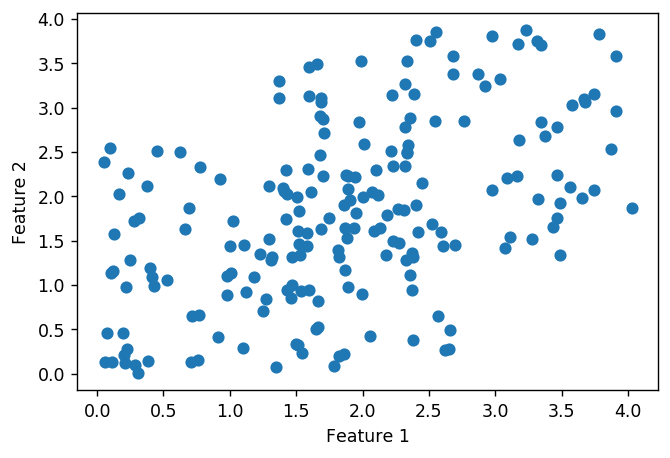

In [6]:
plt.figure(dpi = 125)
plt.plot(data[:,0], data[:,1], ls = 'None', marker = 'o')
plt.xlabel('Feature 1'); plt.ylabel('Feature 2')
plt.show()

We now compute K-means using two clusters:

In [7]:
centroids,_ = kmeans(data,2)
centroids

array([[1.24836557, 1.16394919],
       [2.64183658, 2.62183368]])

We assign each value to a cluster using:

In [8]:
clx,_ = vq(data, centroids)
clx[:50]

array([1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1])

We check it:

(110,)
(110,)


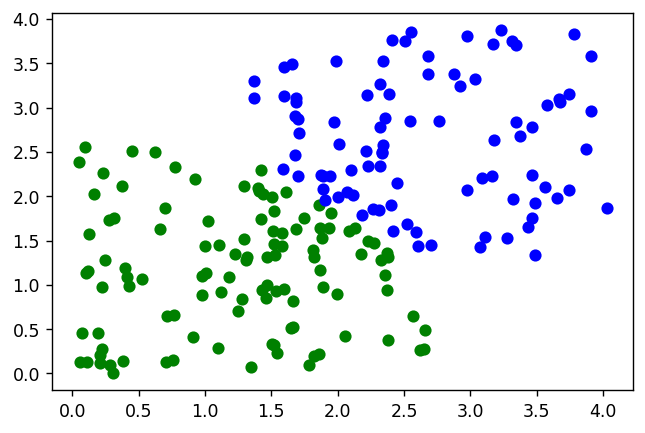

In [9]:
print(data[:,0][clx==0].shape)
print(data[:,1][clx==0].shape)
plt.figure(dpi = 125)
plt.plot(data[:,0][clx == 0], data[:,1][clx == 0], marker = 'o', ls = 'None', color = 'g')
plt.plot(data[:,0][clx == 1], data[:,1][clx == 1], marker = 'o', ls = 'None', color = 'b')
plt.show()

This can be done for **n** clusters.

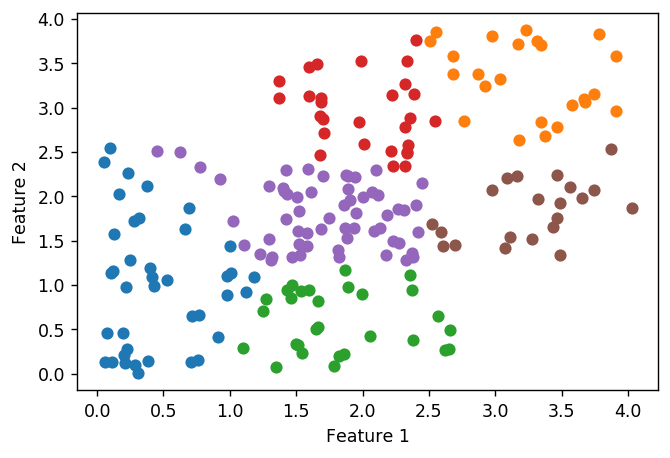

In [10]:
def clusterization(data, n):
    centroids,_ = kmeans(data,n)
    clx,_ = vq(data, centroids)
    plt.figure(dpi = 125)
    for i in range(n):
        plt.plot(data[:,0][clx == i], 
                 data[:,1][clx == i], 
                 marker = 'o', ls = 'None')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.show()
clusterization(data,6)

## 2. Scipy.constants

As its name points out, it provides various constants.

In [11]:
import scipy.constants as constants
print('pi:',constants.pi)
print('golden:',constants.golden)
print('C:',constants.c)
print('h:',constants.h)

pi: 3.141592653589793
golden: 1.618033988749895
C: 299792458.0
h: 6.62607004e-34


It also can look for what it has stored:

In [12]:
print(constants.find("alpha particle mass"))

['alpha particle mass', 'alpha particle mass energy equivalent', 'alpha particle mass energy equivalent in MeV', 'alpha particle mass in u', 'electron to alpha particle mass ratio']


## 3. Scipy.integrate

It allows to integrate numerically.

In [13]:
import scipy.integrate as integrate

In [14]:
# Simple integral
f = lambda x: np.exp(-x**2)
i = integrate.quad(f, 0, 1)
print('Integral:', i[0], 'Absolute Error:', i[1])

Integral: 0.7468241328124271 Absolute Error: 8.291413475940725e-15


In [15]:
# Double integral
f = lambda x,y: 16*x*y
g = lambda x: 0
h = lambda y: np.sqrt(1 - 4*y**2)
i = integrate.dblquad(f, 0, 0.5, g, h)
print(i)

(0.5, 1.7092350012594845e-14)


Triple and over are wrapped in `tplquad` and `nquad`.

## Scipy.interpolate

In [16]:
import scipy.interpolate as interpolate

We use an example:

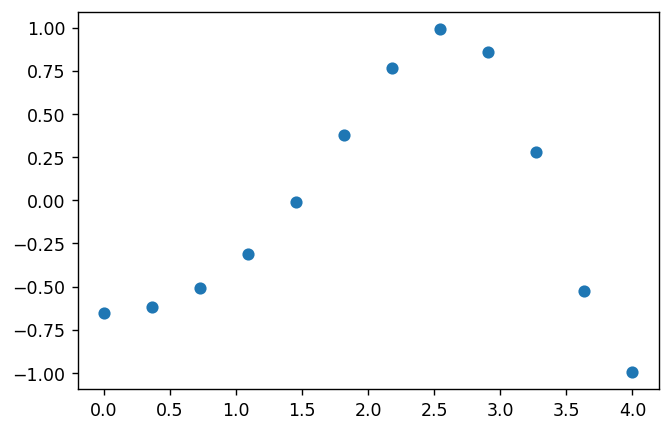

In [17]:
x = np.linspace(0,4,12)
y = np.cos(x**2/3+4)
plt.figure(dpi = 125)
plt.plot(x,y, marker = 'o', ls = 'None')
plt.show()

We can create 1-D interpolations. These will just create a function in the entire domain range.

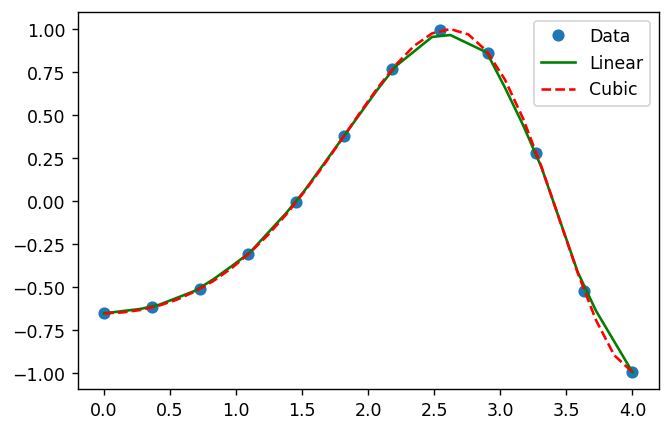

In [18]:
x = np.linspace(0,4,12)
y = np.cos(x**2/3+4)
xnew = np.linspace(0, 4, 30)
f1 = interpolate.interp1d(x,y, kind = 'linear')
f2 = interpolate.interp1d(x,y, kind = 'cubic')
plt.figure(dpi = 125)
plt.plot(x,y, marker = 'o', ls = 'None', label = 'Data')
plt.plot(xnew, f1(xnew), color = 'green', label = 'Linear')
plt.plot(xnew, f2(xnew), color = 'red', ls = '--',label = 'Cubic')
plt.legend(loc = 'best')
plt.show() 

We can use Splines as well.

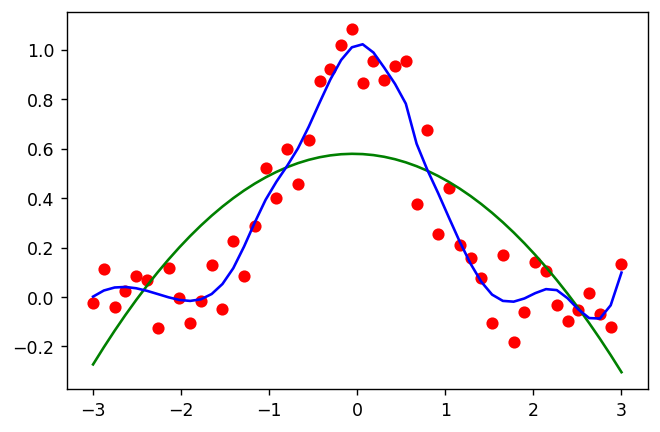

In [19]:
x = np.linspace(-3,3,50)
y = np.exp(-x**2) + 0.1*np.random.randn(50)
spl = interpolate.UnivariateSpline(x,y)
spl2 = interpolate.UnivariateSpline(x,y, s = 0.5)
plt.figure(dpi =125)
plt.plot(x,y, 'ro')
plt.plot(x, spl(x), 'g')
plt.plot(x,spl2(x),'b')
plt.show()

## Scipy.linalg

It contains all the functions inside `numpy.linalg`, besides some other more advanced functions. It may evem be faster, depending on how `numpy` was installed.

The linear equations system

$$ x + 3y + 5z = 10 \\ 2x + 5y + z = 8 \\ 2x + 3y + 8z = 3$$

Which can be reduced to:

$$ Ax = b$$

Can be solved with:

In [20]:
A = np.array([[1,3,5],[2,5,1],[2,3,8]])
b = np.array([10,8,3])

In [21]:
## Solution
x = sci.linalg.solve(A,b)
print(x)

[-9.28  5.16  0.76]


Another useful command is the one to obtain the determinant of a matrix.

In [22]:
det = sci.linalg.det(A)
print(det)

-25.000000000000004


As well as the eigenvalues and eigenvectors.

In [23]:
values,vectors = sci.linalg.eig(A)
print(values)
print(vectors)

[10.5540456 +0.j -0.5873064 +0.j  4.03326081+0.j]
[[-0.51686204 -0.94195144  0.11527992]
 [-0.32845853  0.31778071 -0.81936883]
 [-0.79054957  0.10836468  0.56155611]]


## Scipy.ndimage

This module is dedicated to image processing. Let's start with the `misc` package, that comes with some images:

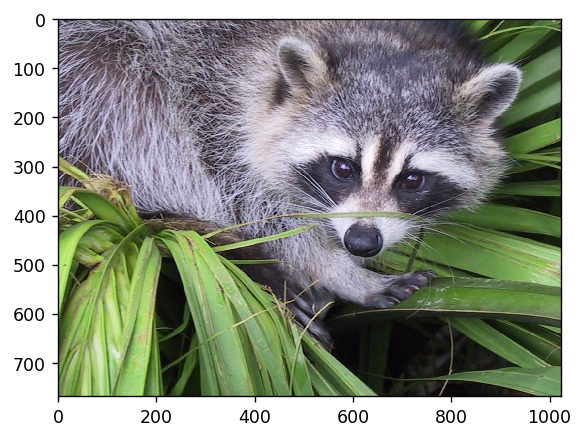

In [24]:
from scipy import misc
image = misc.face()
plt.figure(dpi = 125)
plt.imshow(image)
plt.show()

We can check the statistical information:

In [25]:
print(image.mean(), image.max(), image.min())

110.16274388631184 255 0


And since images are just numbers, we can start with some transformations. For example, cropping:

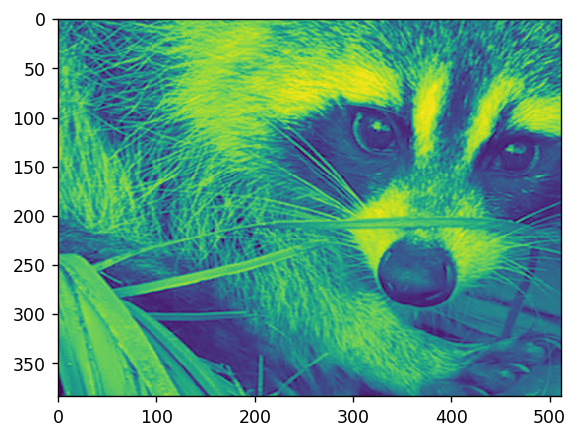

In [26]:
image_gray = misc.face(gray = True)
lx, ly = image_gray.shape
crop_face = image_gray[int(lx/4): int(-lx/4), int(ly/4): int(-ly/4)]
plt.figure(dpi = 125)
plt.imshow(crop_face)
plt.show()

Or flip the image:

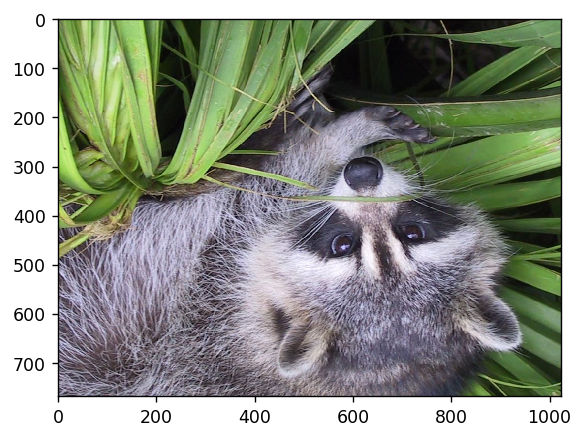

In [27]:
image_flip = np.flipud(image)
plt.figure(dpi = 125)
plt.imshow(image_flip)
plt.show()

And rotate it:

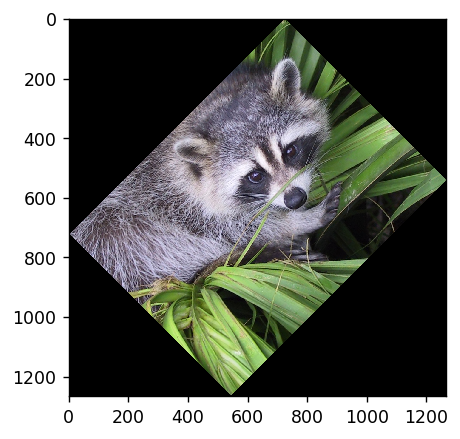

In [28]:
from scipy import ndimage
image_rot = ndimage.rotate(image, 45)
plt.figure(dpi = 125)
plt.imshow(image_rot)
plt.show()

There are much more things that can be done, such as filters, but it is better to use other packages specifically preparated for this, such as openCV.

## Scipy.optimize

Provides several optimization algorithms.

In [29]:
from scipy import optimize

For example, consider the Rosenbrok function. 

$$ f(x,y) = (3 - x)^2 + 100(y - x^2)^2$$

In [30]:
def rosen(x):
    result = (3 - x[0])**2 + 100*(x[1] - x[0]**2)**2
    return result
def gradrosen(x):
    resultx = -2*(3-x[0]) + 200*(x[1]-x[0]**2)*-2*x[0]
    resulty = 0 + 200*(x[1]-x[0]**2)
    return np.array([resultx, resulty])

If we want to obtain a minimum, we can use the following methods:

In [31]:
x0 = [-312, -1232]
#x0 = [2,8]
nelder = optimize.minimize(rosen, x0, method = 'nelder-mead')
powell = optimize.minimize(rosen, x0, method = 'Powell')
newton = optimize.minimize(rosen, x0 
                           , method = 'Newton-CG', jac = gradrosen)
print('Nelder-mead method\n',nelder)
print('\n===============\n')
print('Powell method\n',powell)
print('\n===============\n')
print('Newton - CG method\n',newton)

Nelder-mead method
  final_simplex: (array([[3.00000504, 9.00003088],
       [2.99998871, 8.99993204],
       [3.00000729, 9.00004117]]), array([6.73515509e-11, 1.33135576e-10, 7.16602001e-10]))
           fun: 6.735155094599555e-11
       message: 'Optimization terminated successfully.'
          nfev: 272
           nit: 145
        status: 0
       success: True
             x: array([3.00000504, 9.00003088])


Powell method
    direc: array([[1.30837273e-03, 8.13610251e-03],
       [1.74410903e-10, 1.03756332e-09]])
     fun: 1.6585800532271773e-28
 message: 'Optimization terminated successfully.'
    nfev: 1058
     nit: 35
  status: 0
 success: True
       x: array([3., 9.])


Newton - CG method
      fun: 0.0005816981671883993
     jac: array([ 0.07803456, -0.02121102])
 message: 'Optimization terminated successfully.'
    nfev: 128
    nhev: 0
     nit: 78
    njev: 441
  status: 0
 success: True
       x: array([2.97588469, 8.85585096])
